# Introduction
This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

Here are a few questions that this project will seek to answer:

#### Exploratory
* What is the average life expectancy in these nations?
* What is the average GDP in these nations?
* What is the distribution of that life expectancy? 

#### Analysis
* Has life expectancy increased over time in the six nations?
* Has GDP increased over time in the six nations?
* Is there a correlation between GDP and life expectancy of a country?


Data sources
1. GDP Source: World Bank national accounts data, and OECD National Accounts data files.
2. Life expectancy Data Source: World Health Organization

## Data Wrangling

##### Importing All Modules 

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



##### Load CSV Data & Discover Basic info

In [26]:
all_data = pd.read_csv("all_data.csv")
print(all_data.head())
all_data.dtypes


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

##### Change Column Names To Dataframe Standard

In [27]:
all_data.rename(columns={"Country":"country", "Year":"year", "Life expectancy at birth (years)":"life_expectancy", "GDP":"gdp"}, inplace=True)
all_data.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


##### Explore Columns

In [28]:
print(all_data.country.unique())
print(all_data.year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Exploratory Plots

##### Average Life Expectancy for Each Nation

In [29]:
average_life_table = all_data.groupby("country").life_expectancy.mean().reset_index()
print(average_life_table)

                    country  life_expectancy
0                     Chile         78.94375
1                     China         74.26250
2                   Germany         79.65625
3                    Mexico         75.71875
4  United States of America         78.06250
5                  Zimbabwe         50.09375


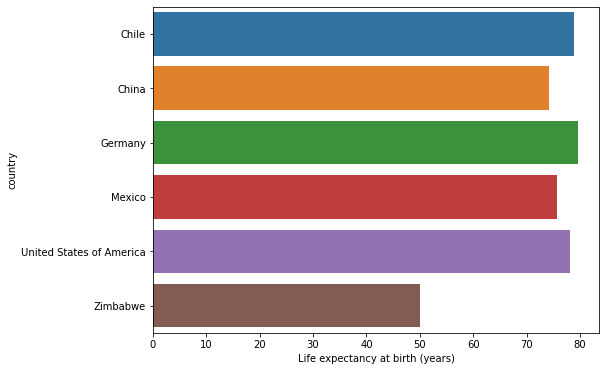

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x="life_expectancy", y="country", data=average_life_table)
plt.xlabel("Life expectancy at birth (years)");

##### Average GDP for Each Nation

In [31]:
average_gdp_table = all_data.groupby("country").gdp.mean().reset_index()
print(average_gdp_table)

                    country           gdp
0                     Chile  1.697888e+11
1                     China  4.957714e+12
2                   Germany  3.094776e+12
3                    Mexico  9.766506e+11
4  United States of America  1.407500e+13
5                  Zimbabwe  9.062580e+09


Text(0.5, 0, 'GDP in Trillions of $')

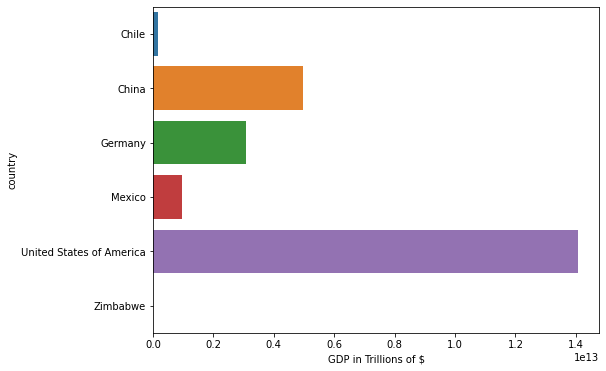

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x="gdp", y="country",data=average_gdp_table)
plt.xlabel("GDP in Trillions of $")

##### Distribution of Life Expectancy & GDP

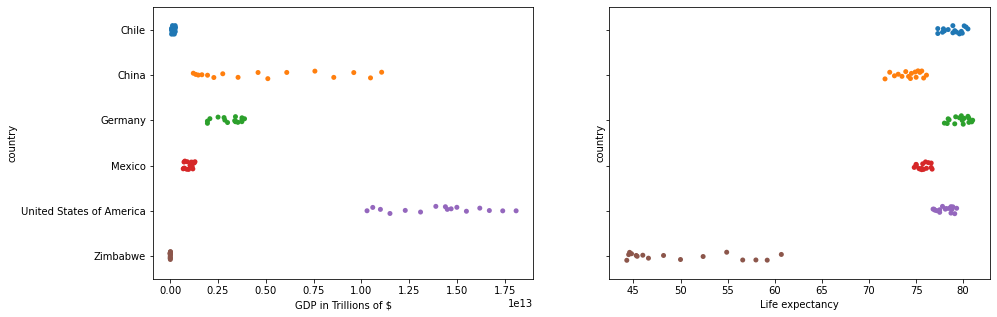

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0] = sns.stripplot(x=all_data.gdp, y=all_data.country, ax=axes[0])
axes[0].set_xlabel("GDP in Trillions of $")
axes[1] = sns.stripplot(x=all_data.life_expectancy, y=all_data.country, ax=axes[1])
axes[1].set_xlabel("Life expectancy");

## Analysis

##### Life Expectancy Per Nation Over Time

Text(0.5, 0, 'Year')

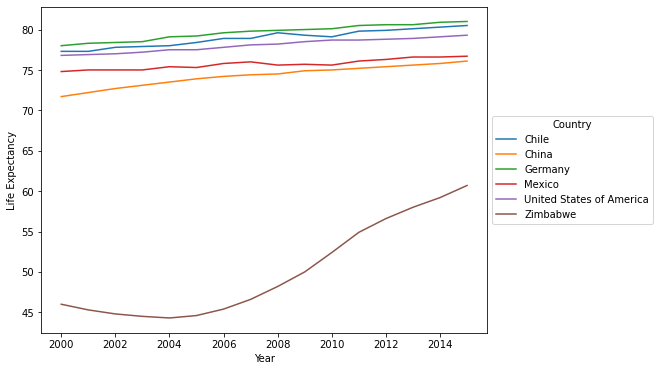

In [64]:
plt.figure(figsize=(8,6))
sns.lineplot(x="year", y="life_expectancy", data=all_data, hue="country")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title="Country")
plt.ylabel("Life Expectancy")
plt.xlabel("Year")

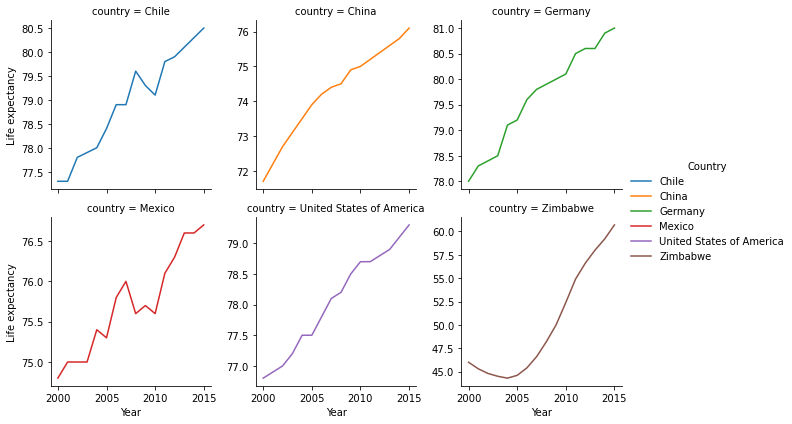

In [63]:
combined = sns.FacetGrid(all_data, col="country", col_wrap=3, hue="country", sharey=False)
combined.map(sns.lineplot, "year", "life_expectancy")
combined.add_legend(title="Country").set_axis_labels("Year","Life expectancy")

##### GDP Per Nation Over Time

Text(0.5, 0, 'Year')

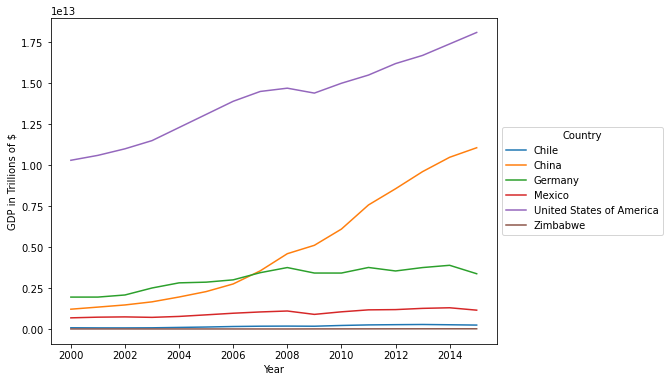

In [62]:
plt.figure(figsize=(8,6))
sns.lineplot(x="year", y="gdp", data=all_data, hue="country")
plt.legend(loc="center left",  bbox_to_anchor=(1,0.5),title="Country")
plt.ylabel("GDP in Trillions of $")
plt.xlabel("Year")

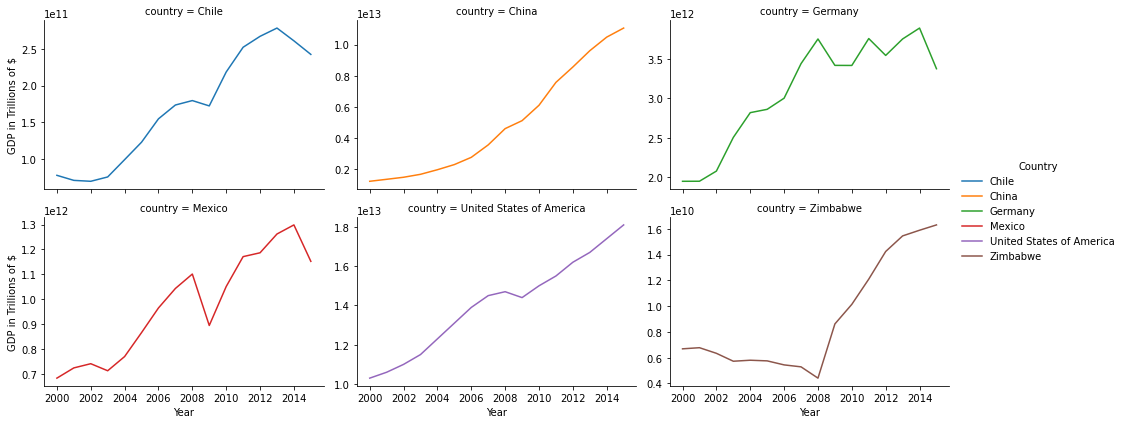

In [61]:
combined_two = sns.FacetGrid(all_data, col="country", col_wrap=3, hue="country", sharey=False, aspect=1.5)
combined_two.map(sns.lineplot, "year", "gdp")
combined_two.add_legend(title="Country").set_axis_labels("Year","GDP in Trillions of $")

##### GDP & Life Expectancy Correlation

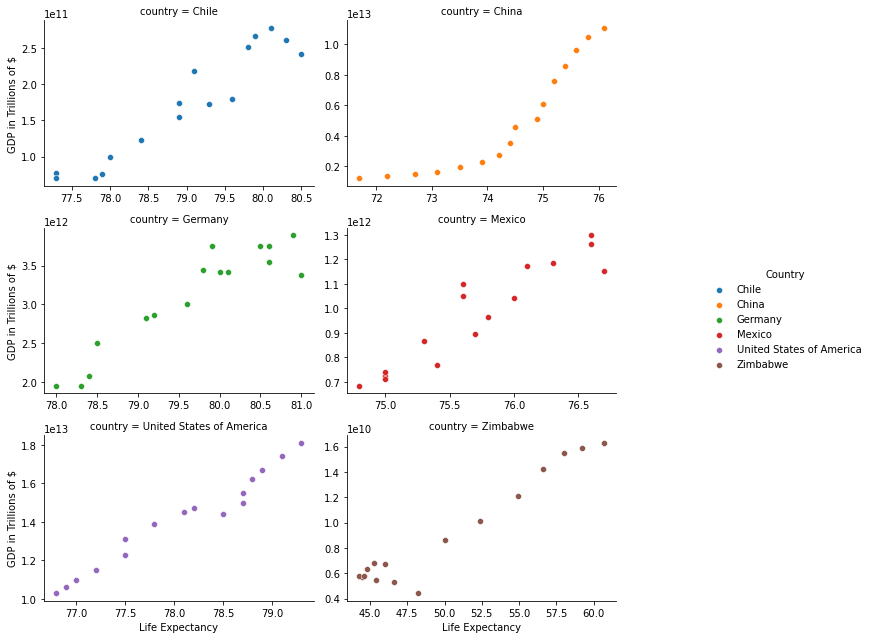

In [60]:
combined_three = sns.FacetGrid(all_data, col="country", col_wrap=2, hue="country", sharey=False, sharex=False, aspect=1.5)
combined_three.map(sns.scatterplot, "life_expectancy", "gdp",)
combined_three.add_legend(loc="center", bbox_to_anchor=(1,0.5), title="Country").set_axis_labels("Life Expectancy","GDP in Trillions of $")

## Conclusion

###### Life Expectancy and GDP of Countries in the dataset all increased from 2000 - 2014 at differing degrees. Overall, it can be shown that an increase in GDP of a nation does lead to an increase in life expectancy, with China having the largest change during the last 2 decades. Thus, it should be a goal of the World Health Organization to focus also on the economic activity of a country for its goal to increase life expectancy of countries throughout the world.